<a href="https://colab.research.google.com/github/JV456/PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import torch
from torch import nn  # torch.nn these the basic building block for graphs
import matplotlib.pyplot as plt
torch.__version__

'2.3.0+cu121'

### we will use a linear regression formula to make a straight line with known parameters

In [44]:
weight = 0.9
bias = 0.2

start = 1
end = 2
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[1.0000],
         [1.0200],
         [1.0400],
         [1.0600],
         [1.0800],
         [1.1000],
         [1.1200],
         [1.1400],
         [1.1600],
         [1.1800]]),
 tensor([[1.1000],
         [1.1180],
         [1.1360],
         [1.1540],
         [1.1720],
         [1.1900],
         [1.2080],
         [1.2260],
         [1.2440],
         [1.2620]]))

In [45]:
len(X), len(y)

(50, 50)

In [46]:
# creating the train and test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [47]:
# visualizing
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  plt.figure(figsize=(10,7))

  #ploting the training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #ploting the testing data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # are there predictions
  if predictions is not None:
    #plot prediction if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

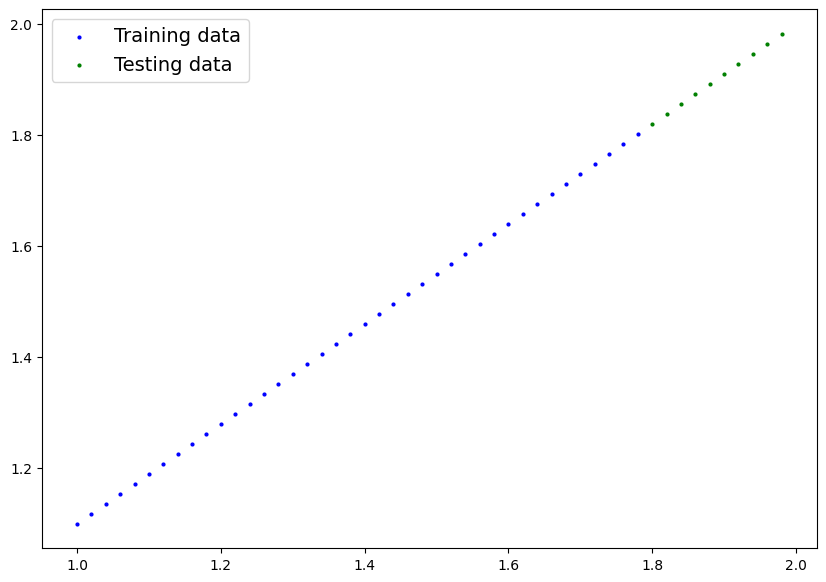

In [48]:
plot_predictions()

## building model

In [49]:
# creting the linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias= nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  #Forward method to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [50]:
# checking the content of our PyTorch model

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [51]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [52]:
weight, bias

(0.9, 0.2)

In [53]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.7349],
        [0.7416],
        [0.7483],
        [0.7551],
        [0.7618],
        [0.7685],
        [0.7753],
        [0.7820],
        [0.7887],
        [0.7955]])

In [54]:
y_test

tensor([[1.8200],
        [1.8380],
        [1.8560],
        [1.8740],
        [1.8920],
        [1.9100],
        [1.9280],
        [1.9460],
        [1.9640],
        [1.9820]])

In [55]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.7349],
        [0.7416],
        [0.7483],
        [0.7551],
        [0.7618],
        [0.7685],
        [0.7753],
        [0.7820],
        [0.7887],
        [0.7955]])


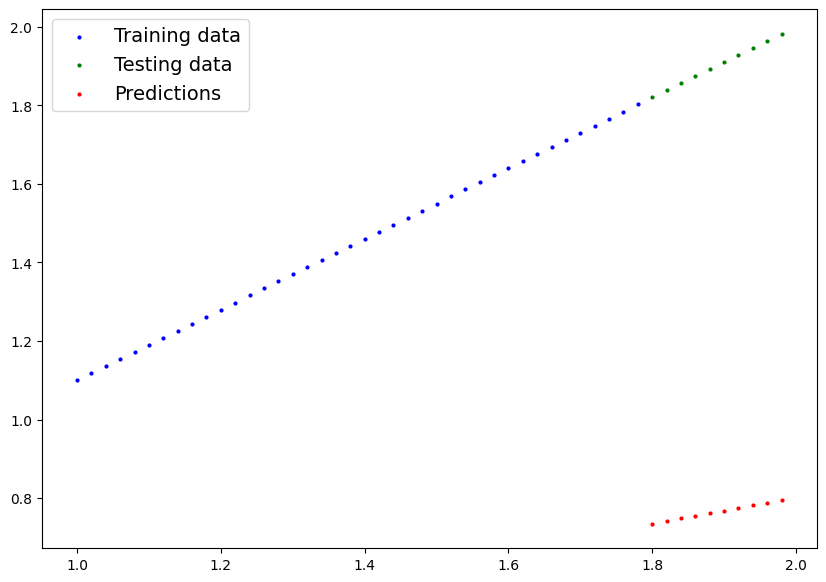

In [56]:
plot_predictions(predictions=y_preds)

In [57]:
y_test - y_preds

tensor([[1.0851],
        [1.0964],
        [1.1077],
        [1.1189],
        [1.1302],
        [1.1415],
        [1.1527],
        [1.1640],
        [1.1753],
        [1.1865]])

# training the model

In [58]:
ln_func = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params= model_0.parameters(), lr = 0.01)

In [59]:
torch.manual_seed(42)

epochs = 150

train_loss_val = []
test_loss_val = []
epoch_cnt = []

for epoch in range(epochs):
  ## training

  model_0.train()

  y_pred = model_0(X_train)

  loss = ln_func(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## testing

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = ln_func(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_cnt.append(epoch)
      train_loss_val.append(loss.detach().numpy())
      test_loss_val.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")


Epoch: 0 | MAE Train Loss: 0.85419100522995 | MAE Test Loss: 1.0995749235153198
Epoch: 10 | MAE Train Loss: 0.5609807968139648 | MAE Test Loss: 0.736864447593689
Epoch: 20 | MAE Train Loss: 0.2677709758281708 | MAE Test Loss: 0.3741548955440521
Epoch: 30 | MAE Train Loss: 0.03282831609249115 | MAE Test Loss: 0.08022264391183853
Epoch: 40 | MAE Train Loss: 0.02979051135480404 | MAE Test Loss: 0.06807658821344376
Epoch: 50 | MAE Train Loss: 0.028450503945350647 | MAE Test Loss: 0.06508319079875946
Epoch: 60 | MAE Train Loss: 0.027110513299703598 | MAE Test Loss: 0.062089789658784866
Epoch: 70 | MAE Train Loss: 0.025770533829927444 | MAE Test Loss: 0.0590963251888752
Epoch: 80 | MAE Train Loss: 0.02443055249750614 | MAE Test Loss: 0.056102871894836426
Epoch: 90 | MAE Train Loss: 0.023090552538633347 | MAE Test Loss: 0.05310946702957153
Epoch: 100 | MAE Train Loss: 0.021750545129179955 | MAE Test Loss: 0.050116073340177536
Epoch: 110 | MAE Train Loss: 0.02041056752204895 | MAE Test Loss: 0

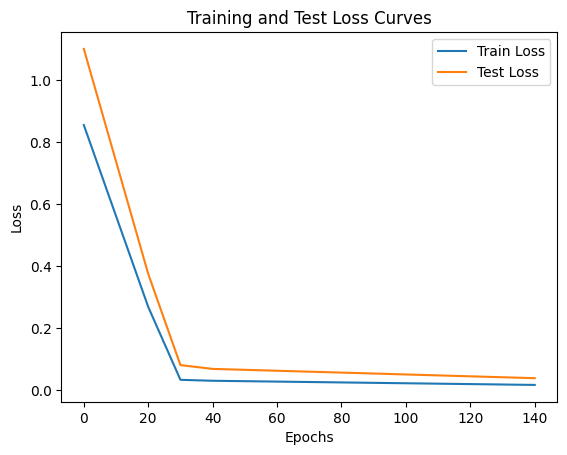

In [60]:
# ploting the loss curves

plt.plot(epoch_cnt, train_loss_val, label = "Train Loss")
plt.plot(epoch_cnt, test_loss_val, label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [61]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"Weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.8251])), ('bias', tensor([0.3063]))])

And the original values for weights and bias are:
Weights: 0.9, bias: 0.2


# making predictions with a trained PyTorch model (Inference)

In [63]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.7915],
        [1.8080],
        [1.8245],
        [1.8410],
        [1.8575],
        [1.8740],
        [1.8905],
        [1.9070],
        [1.9235],
        [1.9400]])

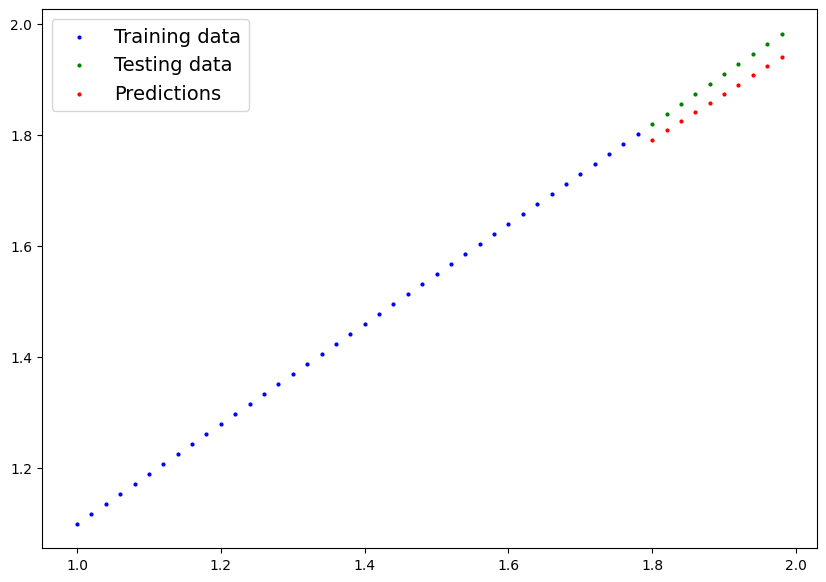

In [64]:
plot_predictions(predictions=y_preds)

# Saving a PyTorch model's state_dict()

In [65]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "Pythorch_Linear_Regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


Saving model to: models/Pythorch_Linear_Regression.pth


In [66]:
# for checking the saved file path

!ls -l models/Pythorch_Linear_Regression.pth

-rw-r--r-- 1 root root 1674 Jun 24 18:13 models/Pythorch_Linear_Regression.pth


# Loading a saved PyTorch model's state_dict()

In [67]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [68]:
# now we will test our loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [69]:
# now we are checking if the loaded model predictions are same as the previous model
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])